In [4]:
import os
import io
import numpy as np
from collections import defaultdict

from surprise import KNNBasic
from surprise import Reader
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import cross_validate

# matplotlib inline
import matplotlib.pyplot as plt

file_path = os.path.expanduser('ml-100k/u.data')

reader = Reader(line_format='user item rating timestamp', sep='\t', rating_scale=(1, 5))

data = Dataset.load_from_file(file_path, reader=reader)

kk = 50
sim_options = {'name': 'cosine', 'user_based': True}
algo = KNNBasic(k=kk, sim_options=sim_options, verbose=True)

cv = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0191  1.0203  1.0136  1.0162  1.0139  1.0166  0.0027  
MAE (testset)     0.8088  0.8067  0.8013  0.8043  0.8003  0.8043  0.0032  
Fit time          1.00    1.01    1.02    1.01    1.02    1.01    0.01    
Test time         3.12    3.14    3.08    3.18    3.11    3.13    0.03    


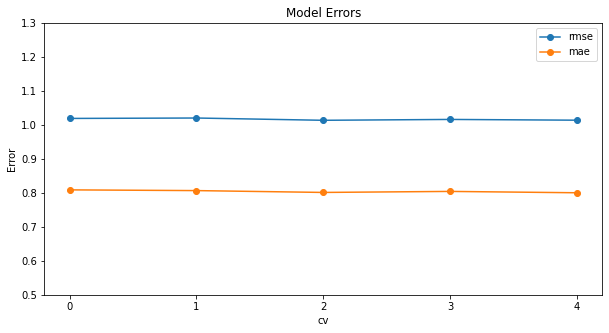

In [5]:
rmse = cv['test_rmse']
mae = cv['test_mae']
x = np.arange(len(rmse))

fig, ax = plt.subplots(figsize = (10, 5))
plt.xticks(np.arange(min(x), max(x) + 1, 1.0))
plt.ylim(0.5, 1.3)
ax.plot(x, rmse, marker='o', label='rmse')
ax.plot(x, mae, marker='o', label='mae')

plt.title('Model Errors', fontsize=12)
plt.xlabel('cv', fontsize=10)
plt.ylabel('Error', fontsize=10)
plt.legend()
plt.show()


In [6]:
p1 = algo.predict(uid = '13', iid = '181', verbose = True)

user: 13         item: 181        r_ui = None   est = 4.22   {'actual_k': 50, 'was_impossible': False}


In [7]:
p2 = algo.predict(uid = '196', iid = '302', r_ui = 4, verbose = True)

user: 196        item: 302        r_ui = 4.00   est = 4.04   {'actual_k': 50, 'was_impossible': False}


In [8]:
def read_item_names(file_path):
    rid_to_name = {}
    name_to_rid = {}
    
    with io.open(file_path, 'r', encoding = 'ISO-8859-1') as f:
        for line in f:
            line = line.split('|')
            rid_to_name[line[0]] = line[1]
            name_to_rid[line[1]] = line[0]
    
    return rid_to_name, name_to_rid

In [9]:
item_filepath = 'ml-100k/u.item'
rid_to_name, name_to_rid = read_item_names(item_filepath)

In [10]:
target_movie = 'Toy Story (1995)'

In [11]:
toy_story_raw_id = name_to_rid[target_movie]
toy_story_inner_id = algo.trainset.to_inner_iid(toy_story_raw_id)
print(target_movie + ':', toy_story_inner_id)

Toy Story (1995): 396


In [12]:
toy_story_neighbors = algo.get_neighbors(toy_story_inner_id, k = 10)
toy_story_neighbors

[18, 42, 110, 207, 216, 231, 247, 267, 279, 367]

In [13]:
print("The movies most similar to '" + target_movie + " are:")

for inner_id in toy_story_neighbors:
    raw_id = algo.trainset.to_raw_iid(inner_id)
    movie = rid_to_name[raw_id]
    print(raw_id, '-', movie)

The movies most similar to 'Toy Story (1995) are:
83 - Much Ado About Nothing (1993)
642 - Grifters, The (1990)
87 - Searching for Bobby Fischer (1993)
295 - Breakdown (1997)
587 - Hour of the Pig, The (1993)
547 - Young Poisoner's Handbook, The (1995)
294 - Liar Liar (1997)
643 - The Innocent (1994)
478 - Philadelphia Story, The (1940)
239 - Sneakers (1992)


In [14]:
def get_top_n(predictions, n = 10):
    
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
        
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    
    return top_n

In [15]:


# Crea el train_set y test_set
train_set = data.build_full_trainset()
test_set = train_set.build_anti_testset()

# Entrena el algoritmo KNN en todo el dataset
algo.fit(train_set)
predictions = algo.test(test_set)

# Calcula el rmse de las predicciones
accuracy.rmse(predictions, verbose = True)



Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9255


0.9254759689787458

In [16]:

#Trae las mejores 10 peliculas para los usuarios que no se encuentran en el train set
top_n = 10
top_pred = get_top_n(predictions, n = top_n)



In [22]:


# User raw Id
uid_list = ['5']

# Imprime las 10 recomendaciones de peliculas para un determinado usuario
for uid, user_ratings in top_pred.items():
    if uid in uid_list:
        for (iid, rating) in user_ratings:
            movie = rid_to_name[iid]
            print('Movie:', iid, '-', movie, ', rating:', str(rating))



Movie: 1189 - Prefontaine (1997) , rating: 5
Movie: 1500 - Santa with Muscles (1996) , rating: 5
Movie: 814 - Great Day in Harlem, A (1994) , rating: 5
Movie: 1536 - Aiqing wansui (1994) , rating: 5
Movie: 1293 - Star Kid (1997) , rating: 5
Movie: 1599 - Someone Else's America (1995) , rating: 5
Movie: 1656 - Little City (1998) , rating: 5
Movie: 1653 - Entertaining Angels: The Dorothy Day Story (1996) , rating: 5
Movie: 1467 - Saint of Fort Washington, The (1993) , rating: 5
Movie: 1122 - They Made Me a Criminal (1939) , rating: 5
